In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time as systime
import datetime as dt
import string
import seaborn as sns
import matplotlib.colors as colors
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [182]:
#pip install bayesian-optimization


Note: you may need to restart the kernel to use updated packages.


In [183]:
#from bayes_opt import BayesianOptimization


In [250]:
dataclean1=pd.read_csv("dataclean.csv")
dataclean1.head()

,Unnamed: 0,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,OFNS_DESC,Latitude,Longitude,dayofweek,year,month,day,hour,minute,timeGroup
0,1,48,BRONX,12/31/2019,18:00:00,ROBBERY,40.838026,-73.881681,Tuesday,2019,12,31,18,0,18-20
1,2,25,MANHATTAN,12/30/2019,20:30:00,PETIT LARCENY,40.800334,-73.945657,Monday,2019,12,30,20,30,20-22
2,3,77,BROOKLYN,12/24/2019,16:55:00,FELONY ASSAULT,40.669832,-73.939376,Tuesday,2019,12,24,16,55,16-18
3,4,52,BRONX,12/30/2019,19:32:00,PETIT LARCENY,40.873671,-73.908014,Monday,2019,12,30,19,32,18-20
4,5,18,MANHATTAN,12/30/2019,15:30:00,PETIT LARCENY,40.760935,-73.994529,Monday,2019,12,30,15,30,14-16


In [251]:
label = preprocessing.LabelEncoder()
label.fit([1, 2, 2, 6])
label.transform([1, 1, 2, 6])

array([0, 0, 1, 2])

In [252]:
crime = label.fit_transform(dataclean1.OFNS_DESC)


In [253]:
timeGroups=pd.get_dummies(dataclean1.timeGroup)
BORO_NMs=pd.get_dummies(dataclean1.BORO_NM)
dayofweek=pd.get_dummies(dataclean1.dayofweek)
precinct=pd.get_dummies(dataclean1.ADDR_PCT_CD) 
days=dataclean1["day"]
dataclean = pd.concat([timeGroups, BORO_NMs,days,dayofweek], axis=1)
dataclean['crime']=crime
dataclean.head()

,0~2,10-12,12-14,14-16,16-18,18-20,2-4,20-22,22-0,4-6,...,STATEN ISLAND,day,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,crime
0,0,0,0,0,0,1,0,0,0,0,...,0,31,0,0,0,0,0,1,0,55
1,0,0,0,0,0,0,0,1,0,0,...,0,30,0,1,0,0,0,0,0,50
2,0,0,0,0,1,0,0,0,0,0,...,0,24,0,0,0,0,0,1,0,17
3,0,0,0,0,0,1,0,0,0,0,...,0,30,0,1,0,0,0,0,0,50
4,0,0,0,1,0,0,0,0,0,0,...,0,30,0,1,0,0,0,0,0,50


In [254]:
X=dataclean.iloc[:,0:25]
y=dataclean['crime']

In [255]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [256]:
print (y_test.shape)
print (X_test.shape)
print (X.shape)
print (y.shape)

(152254,)
(152254, 25)
(461373, 25)
(461373,)


In [258]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred_nb = mnb.predict(X_test)

In [308]:
from sklearn.metrics import log_loss

predict_proba = mnb.predict_proba(X_test)
print("Naive Bayes Log Loss:",log_loss(y_test, predict_proba))
print("Naive Bayes Accuracy:",metrics.accuracy_score(y_test,np.argmax(predict_proba, axis = 1)))

Naive Bayes Log Loss: 3.3094952408365255
Naive Bayes Accuracy: 0.06602782192914472


In [330]:
model_RF = RandomForestClassifier(min_samples_leaf = 200)  
model_RF.fit(X_train,y_train)
y_pred_rf = model_RF.predict(X_test)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [331]:
predict_proba_rf = model_RF.predict_proba(X_test)
print("Random Forest Log Loss:",log_loss(y_test, predict_proba_rf))
print("Random Forest Accuracy:",metrics.accuracy_score(y_test,np.argmax(predict_proba_rf, axis = 1)))

Random Forest Log Loss: 4.9097195450482545
Random Forest Accuracy: 0.07373205301666952


In [317]:
sample_leaf_options = [1,5,10,50,100,200,500]
 
for leaf_size in sample_leaf_options :
    model_RF2 = RandomForestClassifier(oob_score = True, n_jobs = -1,random_state =50,
                                max_features = "auto", min_samples_leaf = leaf_size)
 
model_RF2.fit(X_train,y_train)


y_pred_rf = model_RF2.predict(X_test)
predict_proba_rf2 = model_RF2.predict_proba(X_test)
 
print("Random Forest Log Loss:",log_loss(y_test, predict_proba_rf2))
print("Random Forest Accuracy:",metrics.accuracy_score(y_test,np.argmax(predict_proba_rf2, axis = 1)))

#model_RF2 = RandomForestClassifier(min_samples_leaf = )
#model_RF2.fit(X_train,y_train)
#y_pred_rf = model_RF2.predict(X_test)
#predict_proba_rf2 = model_RF2.predict_proba(X_test)

#print("Random Forest Log Loss:",log_loss(y_test, predict_proba_rf2))
#print("Random Forest Accuracy:",metrics.accuracy_score(y_test,np.argmax(predict_proba_rf2, axis = 1)))

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:460: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:465: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Random Forest Log Loss: 4.76724542109545
Random Forest Accuracy: 0.07191929276078132


,importance
day,0.807049
MANHATTAN,0.027192
0~2,0.014291
2-4,0.010574
BRONX,0.010348
Sunday,0.009435
Friday,0.009220
Tuesday,0.009201
Thursday,0.009047
Saturday,0.008773


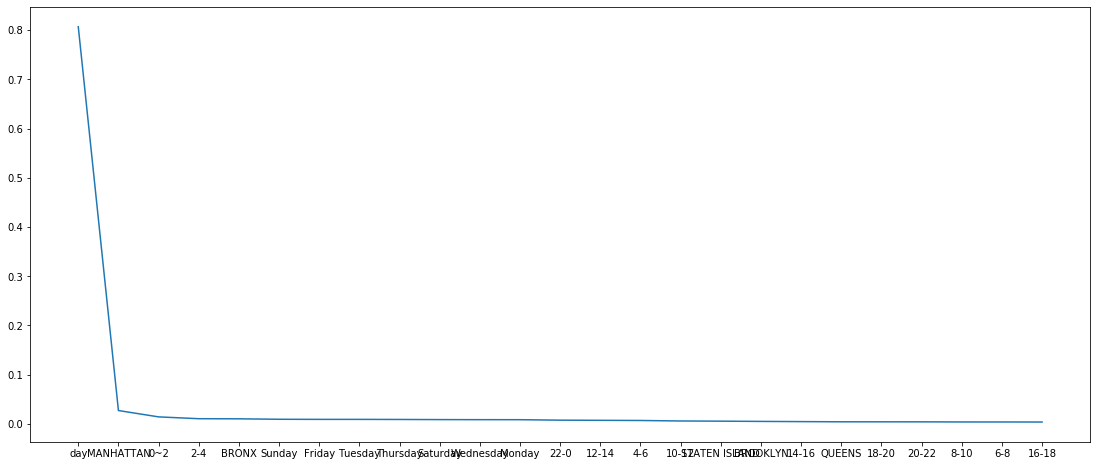

In [310]:
# importance
importances = model_RF.feature_importances_
feature_importances = pd.DataFrame(importances,index = X_train.columns.values, columns=['importance']).sort_values('importance', ascending=False)
plt.figure(figsize=(19,8))

plt.plot(feature_importances)
feature_importances


In [290]:
# logistic Regresssion
from sklearn.linear_model import LogisticRegression
model_lg = LogisticRegression(C=0.1)
model_lg.fit(X_train,y_train)
y_pred_lg = model_lg.predict(X_test)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [294]:
predict_proba_lg = model_lg.predict_proba(X_test)
print("Logistic Regression Log Loss:",log_loss(y_test, predict_proba_lg))
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test,np.argmax(predict_proba_lg, axis = 1)))

Logistic Regression Log Loss: 3.5779249303588605
Logistic Regression Accuracy: 0.06309193847123885


In [ ]:
# Decision Tree


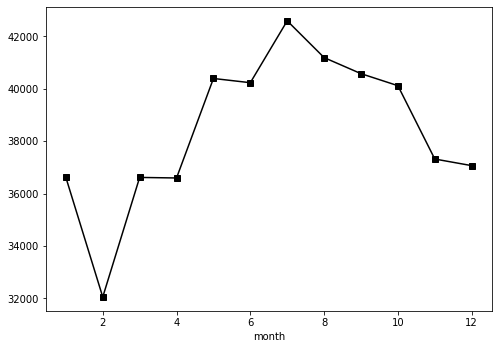

In [276]:
plt.figure(figsize=(8,19))

month_group = dataclean1.groupby('month').size()
plt.subplot(312)
plt.plot(month_group,'ks-')
plt.xlabel('month')
plt.savefig('by month.png')


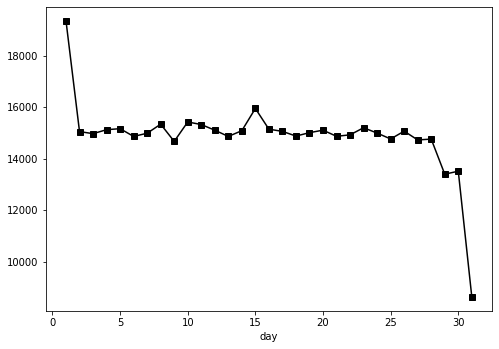

In [278]:
plt.figure(figsize=(8,19))

day_group = dataclean1.groupby('day').size()
plt.subplot(313)
plt.plot(day_group,'ks-')
plt.xlabel('day')
plt.savefig('by day.png')
plt.show()


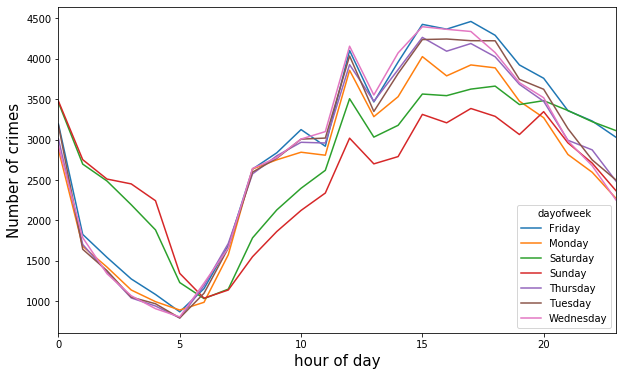

In [281]:
gp_wk_h = dataclean1.groupby(['dayofweek','hour']).size()
gp_wk_h = gp_wk_h.unstack()
gp_t = gp_wk_h.T
gp_t.plot(figsize=(10,6))#行列互换后画图
plt.xlabel('hour of day',size=15)
plt.ylabel('Number of crimes',size=15)

plt.savefig('hour of day by weekday.png')
plt.show()

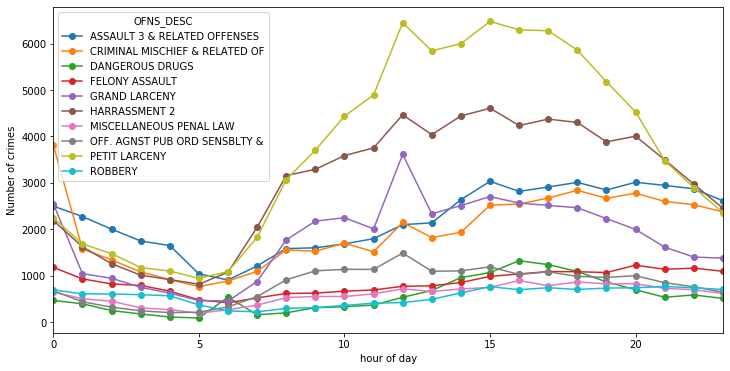

In [284]:
df_cat = dataclean1['OFNS_DESC'].value_counts()

Category10 = df_cat.index.tolist()[:10]
Category10_num = df_cat.tolist()[:10]
df_cat10 = dataclean1.loc[dataclean1['OFNS_DESC'].isin(Category10)]
gp_cat_h = df_cat10.groupby(['OFNS_DESC','hour']).size()
gp_cat_h.unstack().T

gp_cat_h.unstack().T.plot(figsize=(12,6),style='o-')
plt.xlabel('hour of day')
plt.ylabel('Number of crimes')
plt.savefig('hour of day by crime.png')
plt.show()


In [288]:
cate_group = dataclean1.groupby(by='OFNS_DESC').size()sort_values(ascending=False)
top6 = list(cate_group.index[:6])


In [335]:
cate_group = dataclean1.groupby(by='OFNS_DESC').size().sort_values(ascending=False)
print(cate_group)

OFNS_DESC
PETIT LARCENY                           89312
HARRASSMENT 2                           72005
ASSAULT 3 & RELATED OFFENSES            52921
CRIMINAL MISCHIEF & RELATED OF          47185
GRAND LARCENY                           43219
FELONY ASSAULT                          20668
OFF. AGNST PUB ORD SENSBLTY &           19416
MISCELLANEOUS PENAL LAW                 14276
DANGEROUS DRUGS                         13434
ROBBERY                                 13363
BURGLARY                                10762
OFFENSES AGAINST PUBLIC ADMINI           7638
SEX CRIMES                               7345
VEHICLE AND TRAFFIC LAWS                 6770
DANGEROUS WEAPONS                        6295
GRAND LARCENY OF MOTOR VEHICLE           5433
FORGERY                                  4807
INTOXICATED & IMPAIRED DRIVING           4369
THEFT-FRAUD                              3883
CRIMINAL TRESPASS                        3042
FRAUDS                                   2197
RAPE                    

In [287]:
tmp = dataclean1[dataclean1['OFNS_DESC'].map(string.capwords).isin(top6)]
tmp_group = tmp.groupby(['OFNS_DESC','hour']).size()
tmp_group = tmp_group.unstack()
tmp_group.T.plot(figsize=(12,6),style='o-')
plt.show()


TypeError: Empty 'DataFrame': no numeric data to plot

Text(0.5, 0, 'year')

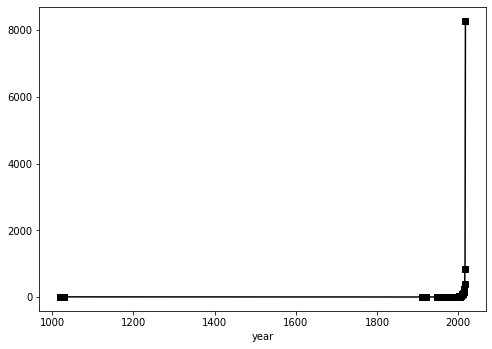

In [175]:
plt.figure(figsize=(8,19))
year_group = dataclean1.groupby('year').size()
plt.subplot(311)
plt.plot(year_group.index[:-1],year_group[:-1],'ks-')
plt.xlabel('year')


In [176]:
year_group

year
1018         2
1019        14
1029         5
1911         1
1918         1
1919         2
1920         2
1949         1
1960         1
1965         2
1970         2
1971         1
1972         2
1974         3
1975         3
1977         4
1978         1
1979         5
1980         2
1981         1
1982         1
1983         2
1984         2
1985         3
1987         1
1989         4
1990         2
1991         5
1992         2
1993         3
1994         8
1995         6
1996         7
1997         5
1998        11
1999         7
2000         6
2001        21
2002        18
2003        17
2004        15
2005        23
2006        25
2007        23
2008        42
2009        70
2010        93
2011        85
2012       105
2013       126
2014       165
2015       232
2016       400
2017       832
2018      8282
2019    450669
dtype: int64